Unique labels: [-1  1]
교차 검증 0 정확도: 0.9440
교차 검증 1 정확도: 0.9356
교차 검증 2 정확도: 0.9536
교차 검증 3 정확도: 0.9542
교차 검증 4 정확도: 0.9508
평균 정확도: 0.9476
훈련 정확도: 0.9561
테스트 정확도: 0.9493
훈련 분류 보고서:
               precision    recall  f1-score   support

          -1     0.9669    0.9335    0.9499      3942
           1     0.9480    0.9743    0.9610      4902

    accuracy                         0.9561      8844
   macro avg     0.9574    0.9539    0.9554      8844
weighted avg     0.9564    0.9561    0.9560      8844

테스트 분류 보고서:
               precision    recall  f1-score   support

          -1     0.9607    0.9205    0.9402       956
           1     0.9413    0.9713    0.9561      1255

    accuracy                         0.9493      2211
   macro avg     0.9510    0.9459    0.9481      2211
weighted avg     0.9497    0.9493    0.9492      2211

훈련 데이터 혼동 행렬:
 [[3680  262]
 [ 126 4776]]


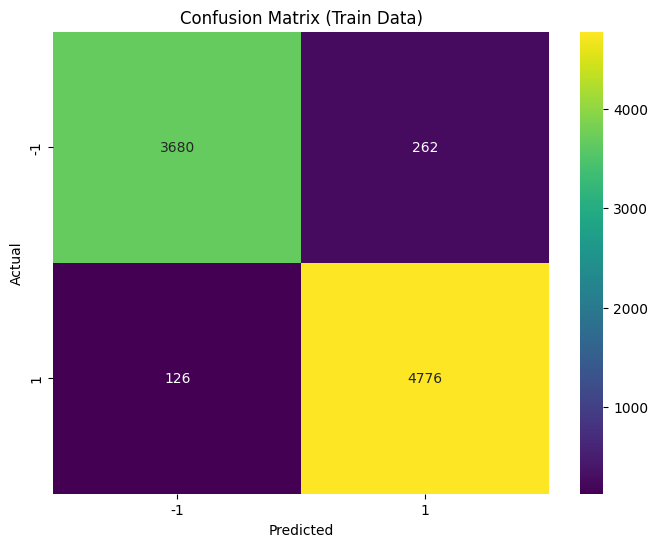

테스트 데이터 혼동 행렬:
 [[ 880   76]
 [  36 1219]]


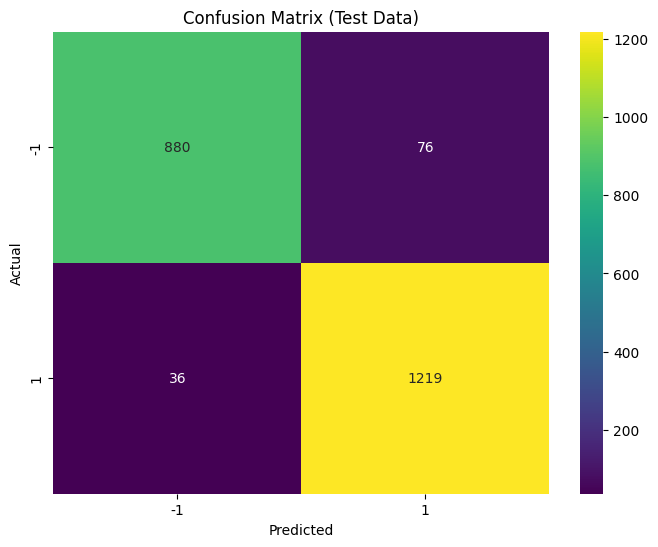

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 로드
data = pd.read_csv('dataset.csv')

# 특징과 라벨 분리
X = data.drop('Result', axis=1)  # 'Result' 열이 라벨인 경우
y = data['Result']

# 라벨의 고유값 확인
unique_labels = y.unique()
print(f"Unique labels: {unique_labels}")

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 정의 (하이퍼파라미터 조정 포함)
model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)

# 교차 검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

# 교차 검증 수행 및 출력
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    model.fit(X_train_fold, y_train_fold)
    val_pred = model.predict(X_val_fold)
    val_accuracy = accuracy_score(y_val_fold, val_pred)
    cv_scores.append(val_accuracy)
    print(f'교차 검증 {fold} 정확도: {val_accuracy:.4f}')

# 교차 검증 평균 정확도 출력
mean_cv_score = sum(cv_scores) / len(cv_scores)
print(f'평균 정확도: {mean_cv_score:.4f}')

# 모델 학습 (전체 학습 데이터 사용)
model.fit(X_train, y_train)

# 예측
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 평가 지표 계산
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# 결과 출력
print(f'훈련 정확도: {train_accuracy:.4f}')
print(f'테스트 정확도: {test_accuracy:.4f}')

# 훈련 데이터 분류 보고서
train_report = classification_report(y_train, y_train_pred, digits=4)
print("훈련 분류 보고서:\n", train_report)

# 테스트 데이터 분류 보고서
test_report = classification_report(y_test, y_test_pred, digits=4)
print("테스트 분류 보고서:\n", test_report)

# 혼동 행렬 계산 (훈련 데이터)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("훈련 데이터 혼동 행렬:\n", conf_matrix_train)

# 혼동 행렬 시각화 (훈련 데이터)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="viridis", xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Train Data)')
plt.show()

# 혼동 행렬 계산 (테스트 데이터)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("테스트 데이터 혼동 행렬:\n", conf_matrix_test)

# 혼동 행렬 시각화 (테스트 데이터)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="viridis", xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Data)')
plt.show()